<a href="https://colab.research.google.com/github/Vivekanand-Khatke/Playstore_data_analysis/blob/main/Play_Store_App_Review_Analysis_(user_review)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
working_dir_path="/content/drive/MyDrive/Colab Notebooks/Capstone projects/Playstore app/"
psd_ur=pd.read_csv(working_dir_path + 'User Reviews.csv')


In [47]:
psd_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [48]:
psd_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [49]:
psd_ur.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [50]:
psd_ur.shape

(64295, 5)

In [51]:
psd_ur.drop("Translated_Review", axis=1, inplace=True)

In [52]:
psd_ur.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000


In [53]:
psd_ur.shape

(64295, 4)

In [54]:
psd_ur.isnull().sum()

App                           0
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [55]:
psd_ur= psd_ur.dropna()

In [56]:
psd_ur.shape

(37432, 4)

In [57]:
psd_ur.App.unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', '1800 Contacts - Lens Store',
       '1LINE – One Line with One Touch',
       '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
       '21-Day Meditation Experience',
       '2Date Dating App, Love and matching',
       '2GIS: directory & navigator', '2RedBeans',
       '2ndLine - Second Phone Number',
       '30 Day Fitness Challenge - Workout at Home',
       '365Scores - Live Scores', '3D Live Neon Weed Launcher',
       '4 in a Row', '4K Wallpapers and Ultra HD Backgrounds',
       '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢', '591房屋交易-香港',
       '7 Cups: Anxiety & Stress Chat', '7 Day Food Journal Challenge',
       '7 Minute Workout', '7 Weeks - Habit & Goal Tracker',
       '8 Ball Pool', '850 Sports News Digest',
       '8fit Workouts & Meal Planner', '95Live -SG#1 Live Streaming App',
       'A Call From Santa Claus!', 'A Word A Day',
       'A&E - Watch Full Episodes of TV Shows',
 

In [58]:
len(psd_ur.App.unique())

865

In [59]:
likert = {
  "Negative": -1,
  "Neutral": 0,
  "Positive": 1
}
psd_ur.Sentiment = psd_ur.Sentiment.apply(lambda x: likert[x]).copy()
psd_ur_mean = psd_ur.groupby("App").mean().copy()

In [60]:
psd_ur.drop_duplicates("App", inplace=True)

In [61]:
psd_ur.shape

(865, 4)

In [62]:
psd_ur = psd_ur.reset_index().drop("index", axis=1).copy()

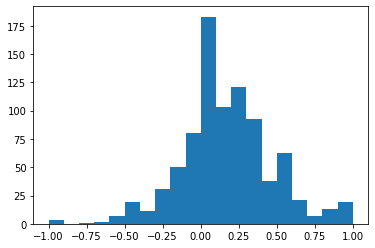

In [63]:
plt.hist(psd_ur['Sentiment_Polarity'], bins = 20)
plt.show()

In [64]:
psd_ur['Sentiment'].value_counts()

 1    577
-1    204
 0     84
Name: Sentiment, dtype: int64